<a href="https://colab.research.google.com/github/CHENNI-Nidhaleddine/TELLING_BIRDS_FROM_AIRPLANES_USING_PYTORCH/blob/master/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import torch
import numpy
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets,transforms
import torch.optim as optim

## Downloading the CIFAR-10 
#### cifar-10 is a dateset that consists of 60.000 32x32 RGB images labeled with an integer corresponding to 1 of 10 classes: airplane (0), automobile (1), bird (2), cat (3),deer (4), dog (5), frog (6), horse (7), ship (8), and truck (9).

In [78]:
data_path = '../data'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True,transform=transforms.ToTensor())
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True,transform=transforms.ToTensor())
class_names=["airplane", "automobile" ,"bird", "cat","deer", "dog", "frog" , "horse" , "ship", "truck"]

Files already downloaded and verified
Files already downloaded and verified


In [79]:
len(cifar10),len(cifar10_val),cifar10.__len__

(50000, 10000, <bound method CIFAR10.__len__ of Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ../data
     Split: Train
     StandardTransform
 Transform: ToTensor()>)

##### Separate images from labels

In [80]:
 all_imgs=torch.stack([img for img,_ in cifar10],dim=3)

##### Some tests

airplane


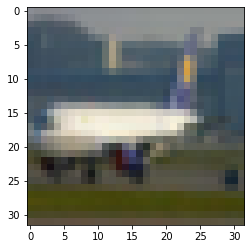

In [81]:
index=93
plt.imshow(all_imgs[:,:,:,index].permute(1,2,0))
print(class_names[cifar10[index][1]])

### Normalizing data

In [82]:
mean=all_imgs.view(3,-1).mean(dim=1)
std=all_imgs.view(3,-1).std(dim=1)
print(mean,std)
transformed_cifar10=datasets.CIFAR10(data_path,train=True,download=False,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=mean,std=std)]))
transformed_cifar10_val=datasets.CIFAR10(data_path,train=False,download=False,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=mean,std=std)]))

tensor([0.4914, 0.4822, 0.4465]) tensor([0.2470, 0.2435, 0.2616])


##### Some tests

(<matplotlib.image.AxesImage at 0x7f6eb2c260d0>, 'airplane')

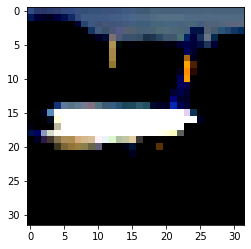

In [83]:
img_t,label=transformed_cifar10[index]
plt.imshow(img_t.permute(1,2,0)),class_names[label]

### Extracting birds and airplanes data

In [84]:
# class_names[0] --> airplane
# class_names[2] --> bird
labels=['airplane','bird']
cifar2=[(img,4%(label+1)) for img,label in transformed_cifar10 if label in [0,2]]
cifar2_val=[(img,4%(label+1)) for img,label in transformed_cifar10_val if label in [0,2]]

##### Some tests:

10000 2000


(<matplotlib.image.AxesImage at 0x7f6eb3f3dc10>, 'airplane')

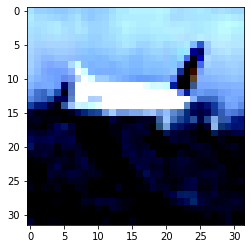

In [85]:
index=35
print(len(cifar2),len(cifar2_val))
plt.imshow(cifar2[index][0].permute(1,2,0)),labels[cifar2[index][1]]

### Building the Neural network 😊 


In [86]:
n_input=3*32*32
n_out=2
n_hidden=512
model=nn.Sequential(
    nn.Linear(n_input,2048),
     nn.Tanh(),
    nn.Linear(2048,1024),
     nn.Tanh(),
    nn.Linear(1024,512),
     nn.Tanh(),
    nn.Linear(512,128),
    nn.Tanh(),
    nn.Linear(128,n_out),
    nn.LogSoftmax(dim=1)
)

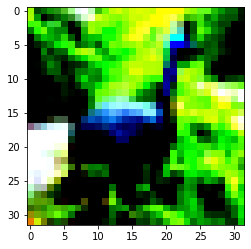

In [87]:
img,label=cifar2[0]
plt.imshow(img.permute(1,2,0))
plt.show()

In [88]:
Loss=nn.NLLLoss()
img_batch=img.view(-1).unsqueeze(0)
img_batch.shape
out=model(img_batch)
y=Loss(out,torch.tensor([label]))
out,y

(tensor([[-0.7835, -0.6103]], grad_fn=<LogSoftmaxBackward0>),
 tensor(0.6103, grad_fn=<NllLossBackward0>))

In [89]:
learning_rate=1e-2
loss_fn=nn.NLLLoss()
optimizer=optim.SGD(model.parameters(),lr=learning_rate)
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,shuffle=False)
n_epochs=100
for epoch in range(n_epochs):
  for imgs,labels in train_loader:
    batch_size = imgs.shape[0]
    out = model(imgs.view(batch_size, -1))
    target=labels
    loss=loss_fn(out,target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  # for img,label in cifar2_val:
  #   out=model(img.view(-1).unsqueeze(0))
  #   target=torch.tensor([label])
  #   loss_val=loss_fn(out,target)
  print('epoch: %d loss: %f loss_val: %f'%(epoch+1,float(loss),float(loss_val)))

epoch: 1 loss: 0.472859 loss_val: 0.343884
epoch: 2 loss: 0.525213 loss_val: 0.343884
epoch: 3 loss: 0.277221 loss_val: 0.343884
epoch: 4 loss: 0.422954 loss_val: 0.343884
epoch: 5 loss: 0.485279 loss_val: 0.343884
epoch: 6 loss: 0.411265 loss_val: 0.343884
epoch: 7 loss: 0.391647 loss_val: 0.343884
epoch: 8 loss: 0.314549 loss_val: 0.343884
epoch: 9 loss: 0.425403 loss_val: 0.343884
epoch: 10 loss: 0.482336 loss_val: 0.343884
epoch: 11 loss: 0.364925 loss_val: 0.343884
epoch: 12 loss: 0.606530 loss_val: 0.343884
epoch: 13 loss: 0.388204 loss_val: 0.343884
epoch: 14 loss: 0.372126 loss_val: 0.343884
epoch: 15 loss: 0.241540 loss_val: 0.343884
epoch: 16 loss: 0.371362 loss_val: 0.343884
epoch: 17 loss: 0.075019 loss_val: 0.343884
epoch: 18 loss: 0.166159 loss_val: 0.343884
epoch: 19 loss: 0.304397 loss_val: 0.343884
epoch: 20 loss: 0.469208 loss_val: 0.343884
epoch: 21 loss: 0.312668 loss_val: 0.343884
epoch: 22 loss: 0.283997 loss_val: 0.343884
epoch: 23 loss: 0.416713 loss_val: 0.3438

In [90]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,shuffle=False)

correct = 0
total = 0
with torch.no_grad():
  for imgs, labels in val_loader:
    batch_size = imgs.shape[0]
    outputs = model(imgs.view(batch_size, -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())
  print("Accuracy: %f", correct / total)

Accuracy: %f 0.8015


In [92]:
numel_list=[p.numel() for p in model.parameters() if (p.requires_grad==True)]
sum(numel_list),numel_list

(8982402, [6291456, 2048, 2097152, 1024, 524288, 512, 65536, 128, 256, 2])

In [94]:
loader = torch.utils.data.DataLoader(cifar2, batch_size=64,shuffle=False)

correct = 0
total = 0
with torch.no_grad():
  for imgs, labels in loader:
    batch_size = imgs.shape[0]
    outputs = model(imgs.view(batch_size, -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())
  print("Accuracy: %f", correct / total)

Accuracy: %f 0.9999
